In [1]:
import matplotlib.pyplot as plt
import numpy as np

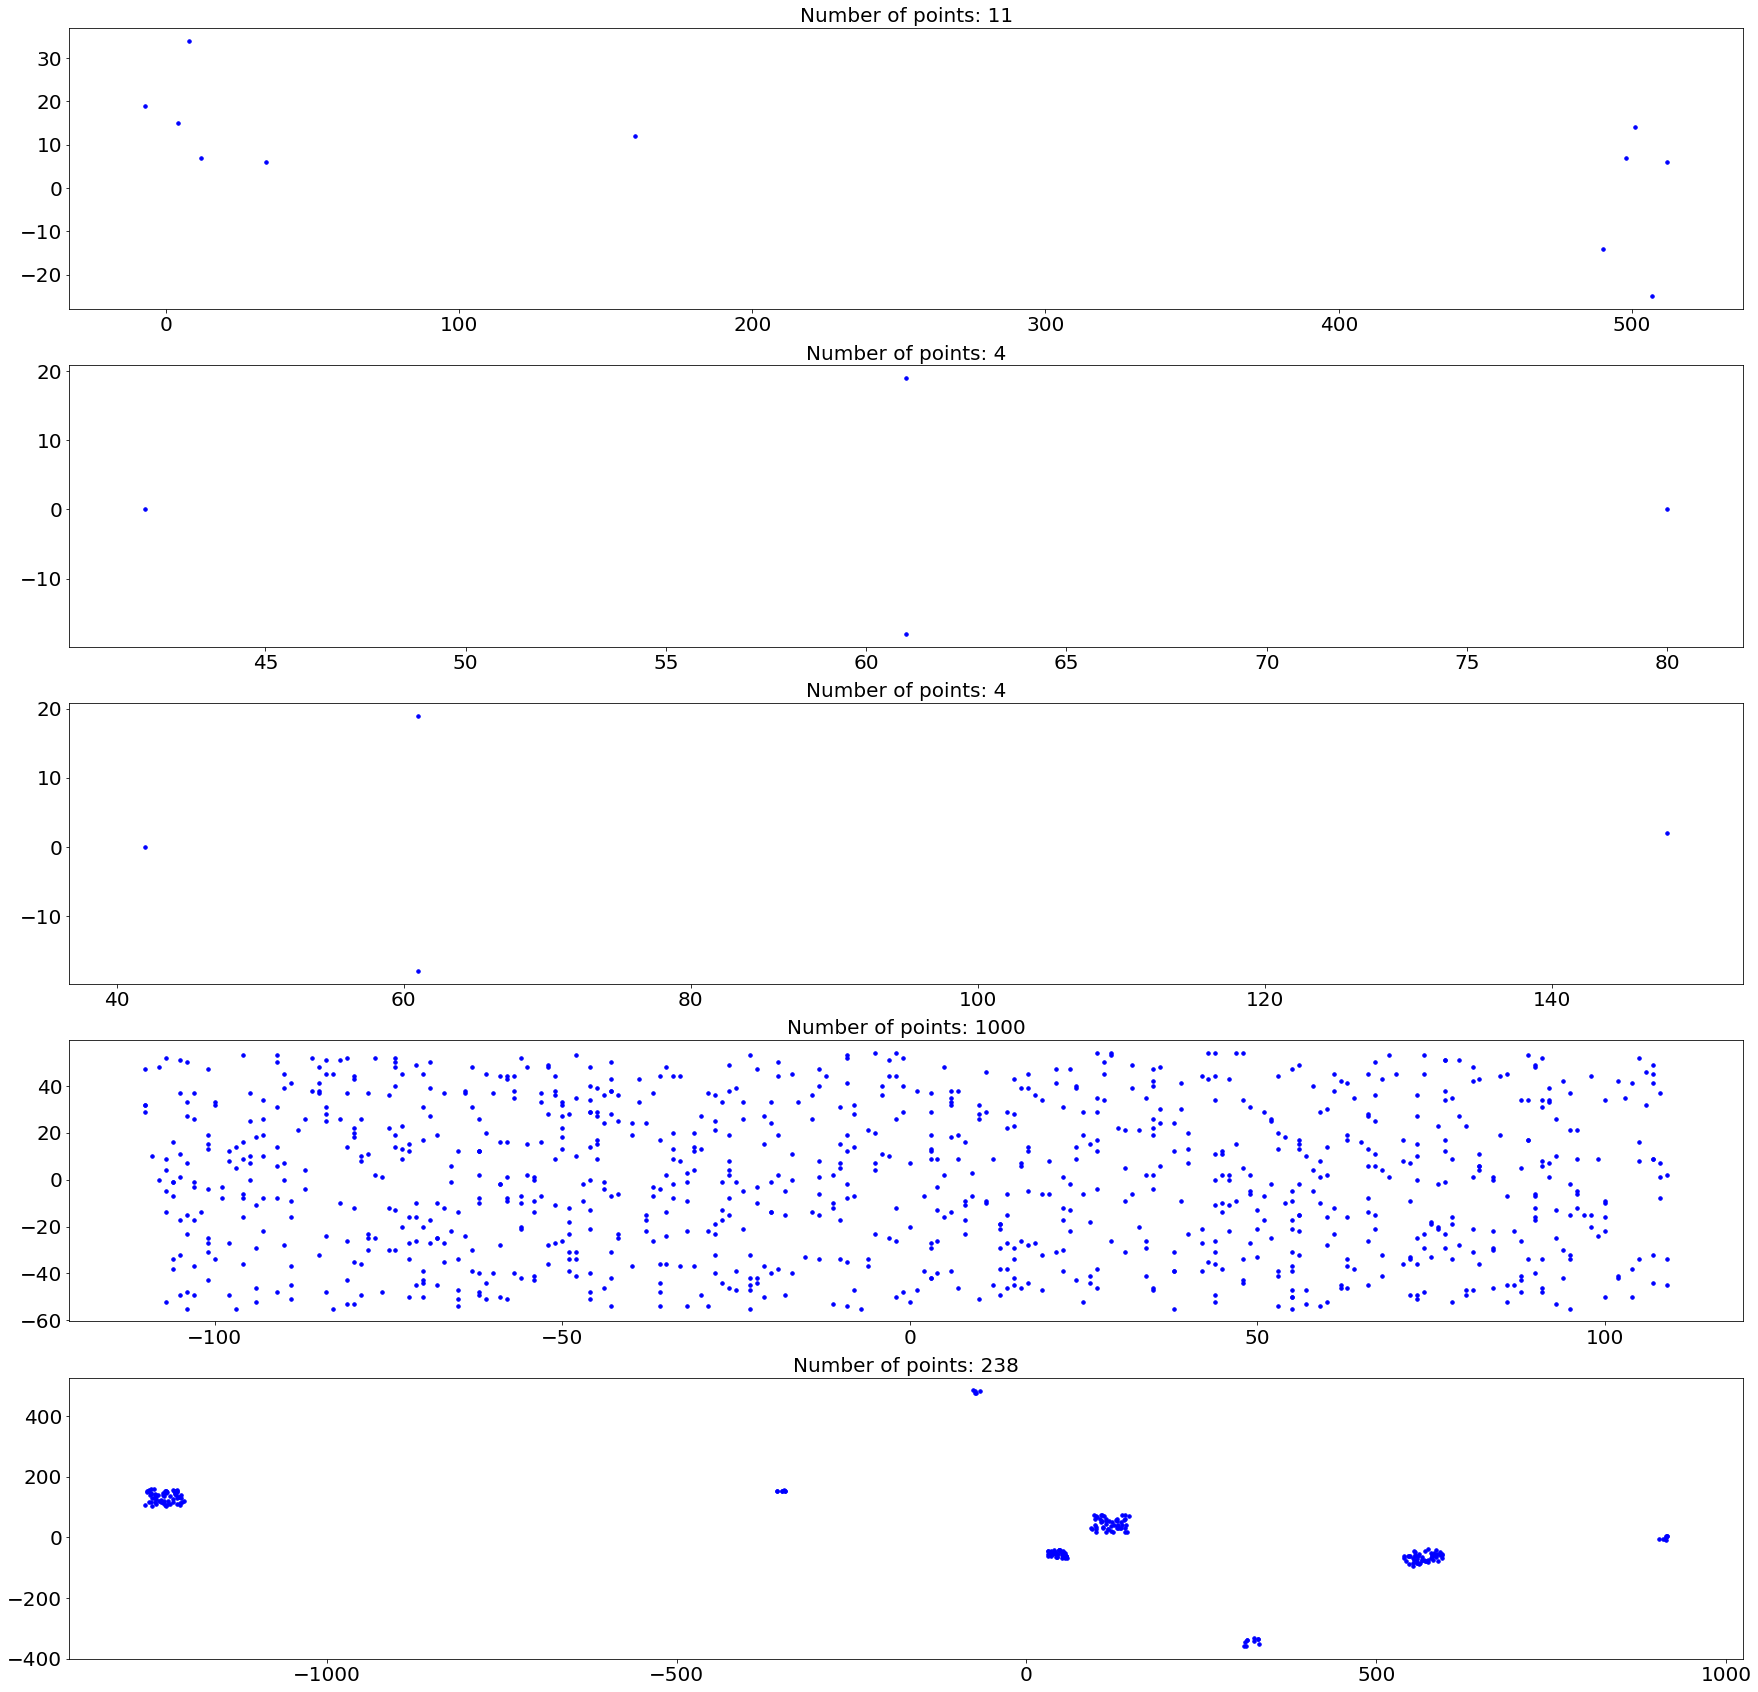

In [57]:
import zipfile
import os

archive = zipfile.ZipFile('dead_moroz.zip', 'r')
data = []
for i in range(1,6):
    imgdata = archive.read("dead_moroz/00{}.dat".format(i))
    data.append(list(map(float, imgdata.decode("utf-8").split())))

fig, ax = plt.subplots(5,1, figsize=[30, 30])
for i in range(5):
    num_elem = int(data[i][0])
    x = data[i][1:2*num_elem + 1:2]
    y = data[i][2:2*num_elem + 1:2]
    ax[i].scatter(x,y, s=12, c = 'blue')
    ax[i].set_title(f'Number of points: {len(x)}', fontsize = 20)
    ax[i].tick_params(axis='both', which='major', labelsize=20)
fig.savefig('episode-1.png', bbox_inches = 'tight')


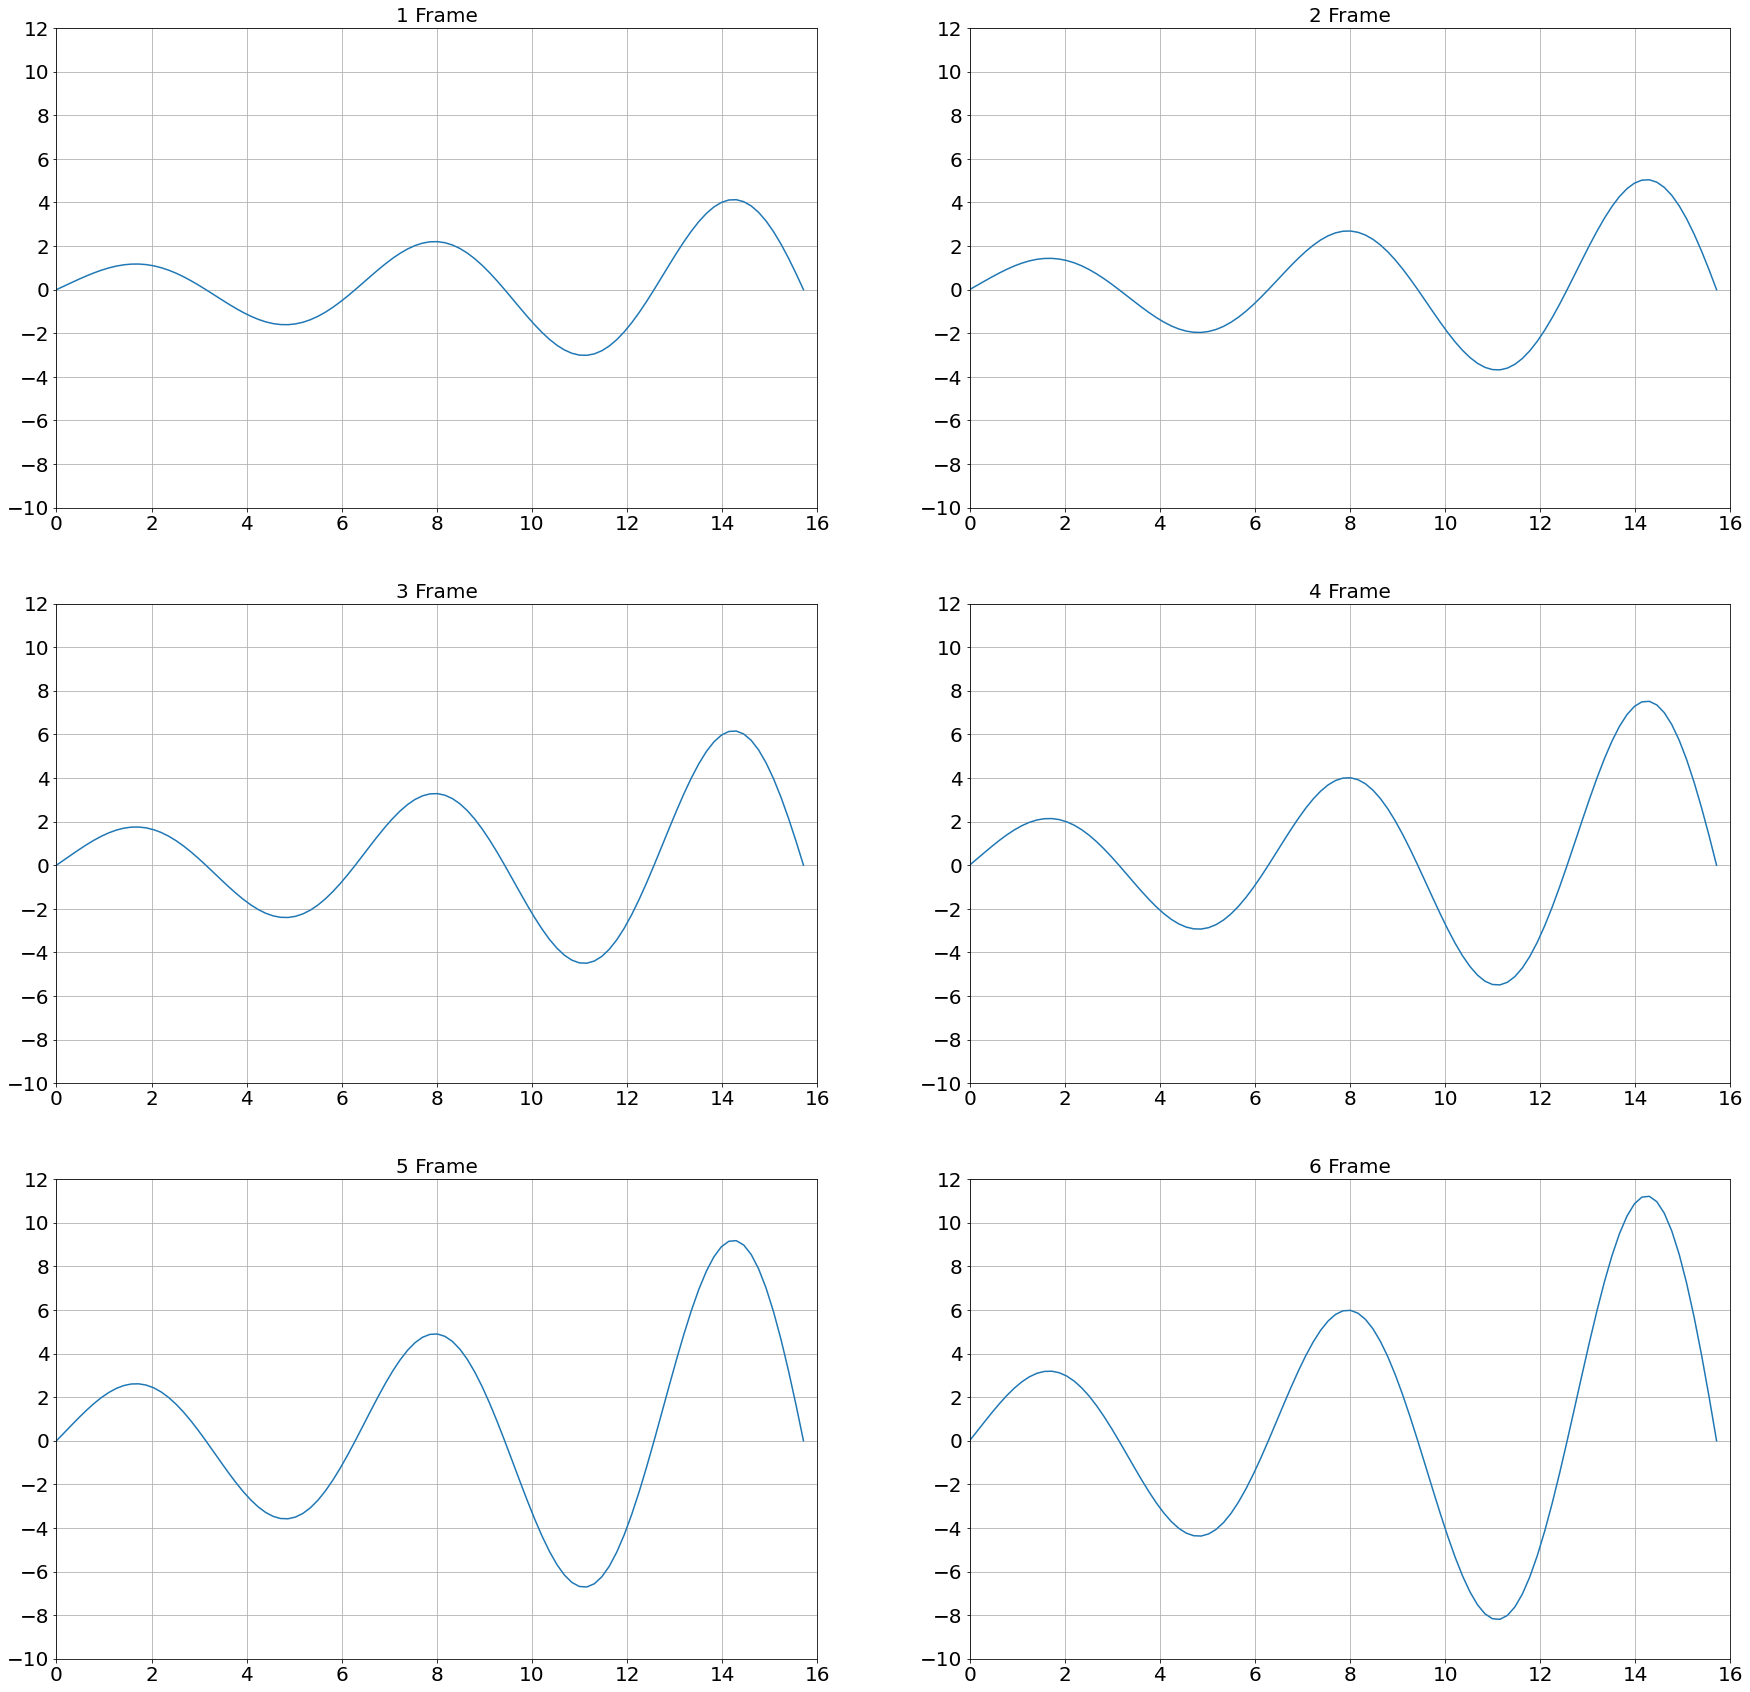

In [58]:
data = []

with open('frames.dat', 'r') as f:
    for line in f.readlines():
        data.append(list(map(float, line.split())))
        
x = []
y = []
for i in range(0, len(data), 2):
    x.append(data[i])
    y.append(data[i+1])

fig, ax = plt.subplots(3, 2, figsize=[30, 30])

for i in range(3):
    for j in range(2):
        ax[i,j].set_xlim(0, 16)
        ax[i,j].set_ylim(-9, 12)
        ax[i,j].grid()
        ax[i,j].plot(x[i * 2+ j], y[i*2+j])
        ax[i,j].set_yticks(np.linspace(-10, 12, 12))
        ax[i,j].set_title(str(i * 2 + j + 1) + ' Frame', fontsize=20)
        ax[i, j].tick_params(axis='both', which='major', labelsize=20)
                   
fig.savefig('episode-2.png', bbox_inches = 'tight')

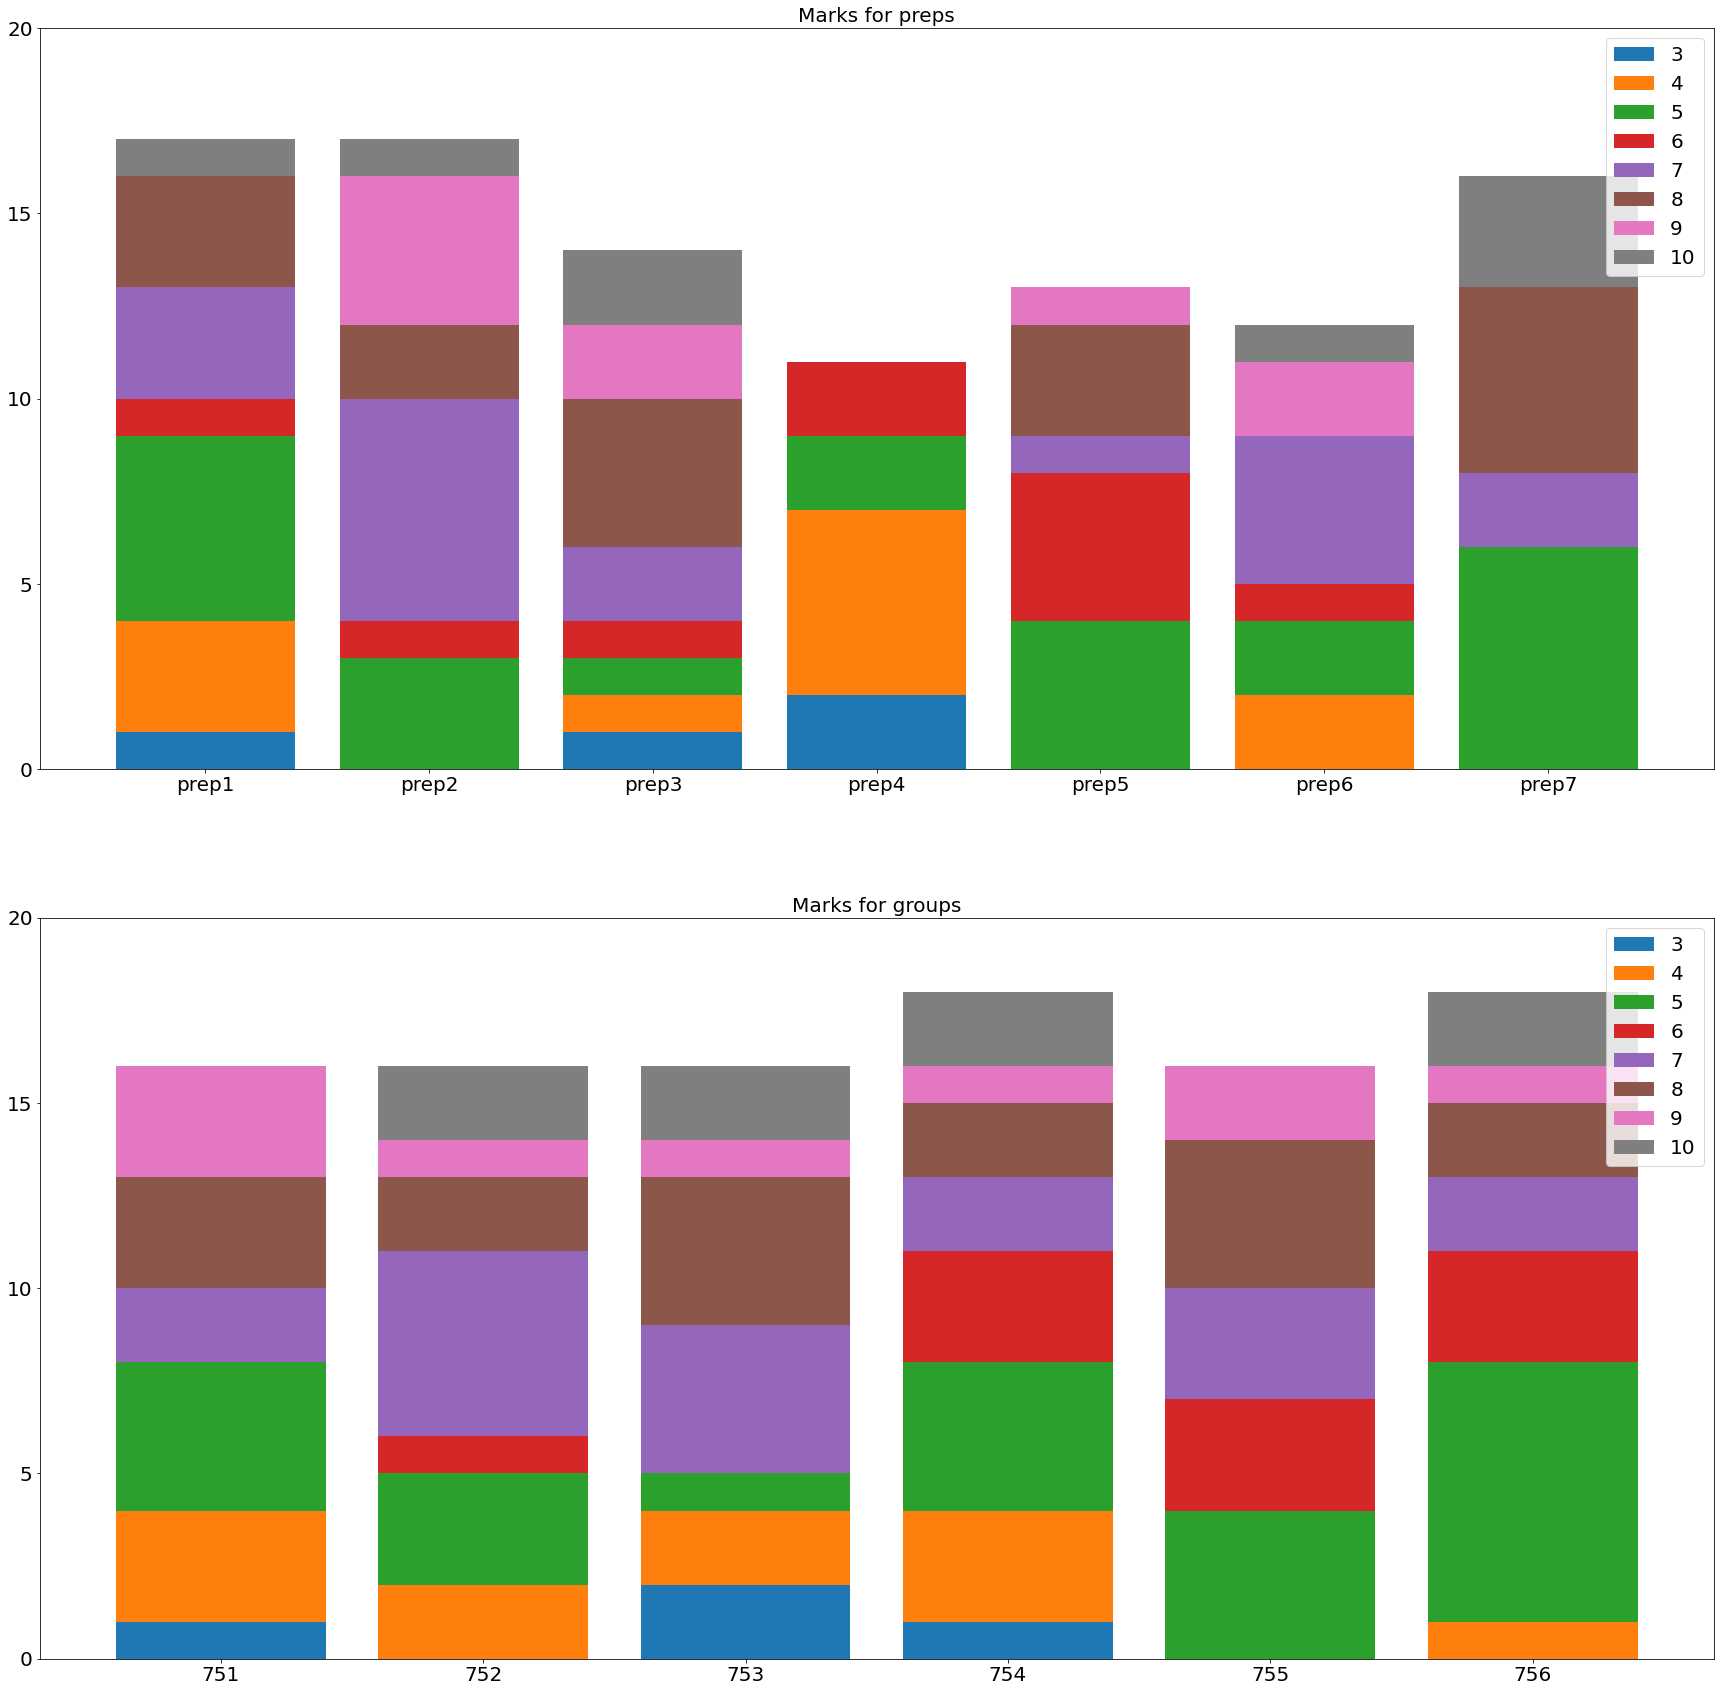

In [59]:
import csv

d = dict()
d1 = dict()
fig, ax = plt.subplots(2,1, figsize=[30, 30])


with open('students.csv') as f:
    reader = csv.reader(f)
    for row in reader:
        b = row[0].split(';')
        d[b[0]]=d.setdefault(b[0], [0 for i in range(8)])
        d[b[0]][int(b[2]) - 3] += 1
        d1[b[1]]=d1.setdefault(b[1], [0 for i in range(8)])
        d1[b[1]][int(b[2]) - 3] += 1

bottom =np.array([0 for i in range(len(d))])
amount = np.array([0 for i in range(len(d))])
for i in range(8):
    for k in range(len(d)):
        amount[k] = d[sorted(d)[k]][i]
    ax[0].bar(sorted(d), amount, bottom = bottom)
    bottom += amount

ax[0].set_yticks(np.linspace(0, 20, 5))
ax[0].legend([ '3', '4', '5', '6', '7', '8', '9', '10'], fontsize = 20, loc='upper right')
ax[0].set_title('Marks for preps', fontsize = 20)
ax[0].tick_params(axis='both', which='major', labelsize=20)


bottom =np.array([0 for i in range(len(d1))])
amount = np.array([0 for i in range(len(d1))])
for i in range(8):
    for k in range(len(d1)):
        amount[k] = d1[sorted(d1)[k]][i]
    ax[1].bar(sorted(d1), amount, bottom = bottom)
    bottom += amount

ax[1].set_yticks(np.linspace(0, 20, 5))
ax[1].legend([ '3', '4', '5', '6', '7', '8', '9', '10'], fontsize = 20, loc='upper right')
ax[1].set_title('Marks for groups', fontsize = 20)
ax[1].tick_params(axis='both', which='major', labelsize=20)

fig.savefig('episode-3.png', bbox_inches = 'tight')

